In [1]:
import pandas as pd
import numpy as n
import sys

import seaborn as sns
import chess
sns.set()

In [2]:
df = pd.read_csv("games.csv")

In [3]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [4]:
((df.isnull().sum() / len(df)) * 100).round(2)

id                0.0
rated             0.0
created_at        0.0
last_move_at      0.0
turns             0.0
victory_status    0.0
winner            0.0
increment_code    0.0
white_id          0.0
white_rating      0.0
black_id          0.0
black_rating      0.0
moves             0.0
opening_eco       0.0
opening_name      0.0
opening_ply       0.0
dtype: float64

In [5]:
df.duplicated().sum()

429

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
columns = list(df.columns)
print(columns)

['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [8]:
for col in columns:
    print("{}: {}".format(col, len(df[col].value_counts())))


id: 19113
rated: 2
created_at: 13151
last_move_at: 13186
turns: 211
victory_status: 4
winner: 3
increment_code: 400
white_id: 9438
white_rating: 1516
black_id: 9331
black_rating: 1521
moves: 18920
opening_eco: 365
opening_name: 1477
opening_ply: 23


In [9]:
len(df)

19629

In [10]:
data = df.copy()

In [11]:
#gives us more columns than expected
#data = pd.get_dummies(df, 'winner', drop_first=True)
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Binning people based on their ratings

In [12]:
#First check if the ratings are within similar ranges

rating_diff = data["white_rating"] - data["black_rating"]
rating_range_within = abs(rating_diff) <= 1000
rating_range_out = abs(rating_diff) > 1000
print("out of {} games, {} games are within range and {} games are not".format(len(data), rating_range_within.sum(), rating_range_out.sum()))

out of 19629 games, 19568 games are within range and 61 games are not


In [13]:
data = data[rating_range_within]
len(data)

19568

In [14]:
df["rating_diff"] = rating_diff
df.head()

C:\Users\Jhon\AppData\Local\Temp\ipykernel_21736\3718599091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating_diff"] = rating_diff


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54


In [15]:
#data = pd.get_dummies(data=data, columns=["winner"], drop_first=True)
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


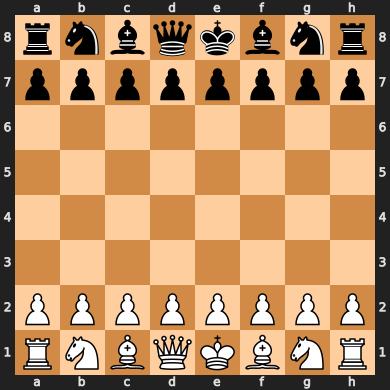

In [16]:
board = chess.Board()
board

In [17]:
moves_history = df["moves"]

print(moves_history)

board = chess.Board()
print(board)
test_moves = moves_history[0]
test_moves = test_moves.split()
for move in test_moves:
    board.push_san(move)
    print(board)
    

0        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20053    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20054    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20055    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20056    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20057    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 19629, dtype: object
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . .

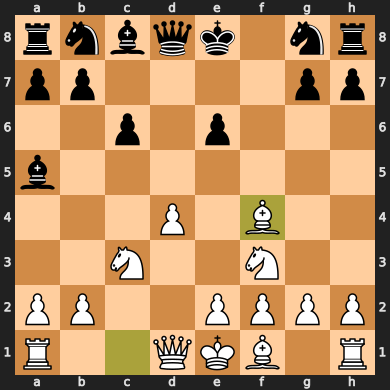

In [18]:
board

In [19]:
columns = df.columns
columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_diff'],
      dtype='object')

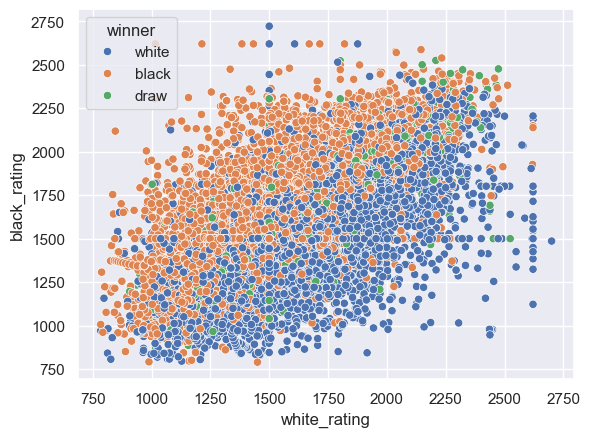

In [20]:

ax = sns.scatterplot(df, x='white_rating', y='black_rating', hue="winner")


In [21]:
rating_bin = [0, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2300, 2400, 2500, 2700]
labels = ["Novices", "E", "D", "C", "B", "A", "CM", "NM", "FM", "IM", "GM"]
df['white_category'] = pd.cut(x = df['white_rating'], bins = rating_bin, labels = labels, include_lowest = True)


C:\Users\Jhon\AppData\Local\Temp\ipykernel_21736\1832368124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white_category'] = pd.cut(x = df['white_rating'], bins = rating_bin, labels = labels, include_lowest = True)


In [22]:
df['black_category'] = pd.cut(x = df['black_rating'], bins = rating_bin, labels = labels, include_lowest = True)
#df = df.drop(columns="white_category")
df.head()

C:\Users\Jhon\AppData\Local\Temp\ipykernel_21736\3484983784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['black_category'] = pd.cut(x = df['black_rating'], bins = rating_bin, labels = labels, include_lowest = True)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff,white_category,black_category
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,C,E
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,D,D
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4,C,C
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15,C,C
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,C,C


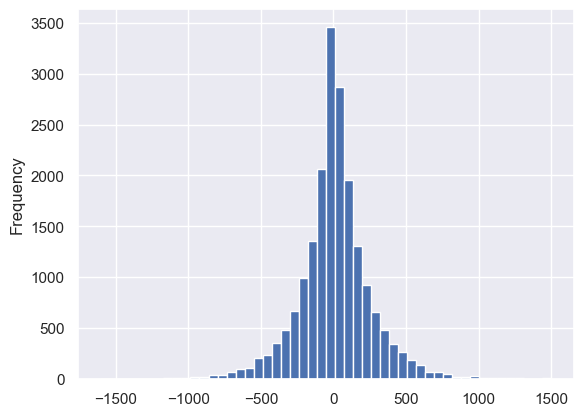

In [23]:
ax = df["rating_diff"].plot(kind="hist", bins = 50, )

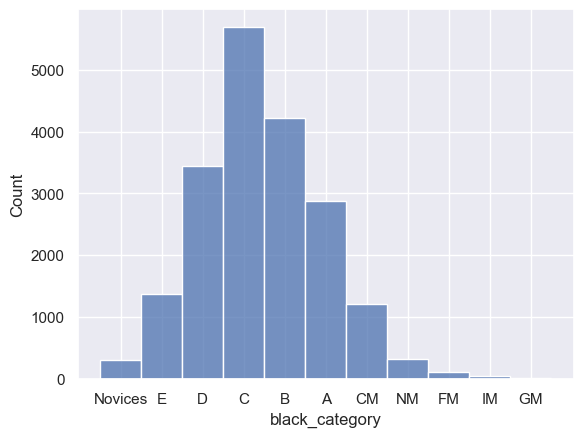

In [24]:
ax = sns.histplot(df, x='black_category')

In [25]:
df["white_higher_elo"] = df["rating_diff"] > 0
df.query("(white_higher_elo and winner == 'draw')")

C:\Users\Jhon\AppData\Local\Temp\ipykernel_21736\4021606065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["white_higher_elo"] = df["rating_diff"] > 0


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff,white_category,black_category,white_higher_elo
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,248,D,E,True
40,R9a2DLwe,False,1.499700e+12,1.499700e+12,32,draw,draw,20+25,white_queen_1990,1207,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Bg5 Bg7 B...,B70,Sicilian Defense: Dragon Variation,10,229,D,Novices,True
98,h1unxHlo,True,1.504200e+12,1.504200e+12,113,draw,draw,15+0,avelez8,1745,anonymous1705,1714,d4 d5 c4 Nf6 Nc3 Bf5 Bf4 a6 Nf3 e6 a3 Nc6 e3 B...,D06,Queen's Gambit Refused: Marshall Defense,4,31,B,B,True
176,fPPfEuu5,False,1.503090e+12,1.503090e+12,144,outoftime,draw,10+0,isachess,1866,teguhmaster,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4,23,A,A,True
181,A7ddojjI,True,1.501880e+12,1.501880e+12,107,draw,draw,15+5,isachess,1866,claudiucojo,1835,e4 e5 Nf3 Nc6 Bc4 Nf6 d3 h6 O-O Bc5 a4 O-O c3 ...,C55,Italian Game: Two Knights Defense | Modern Bi...,7,31,A,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865,amNZLpnf,False,1.501773e+12,1.501774e+12,31,draw,draw,8+1,zen3000,1500,zakharbarza,1144,e4 e5 Nf3 Nc6 Bc4 Bc5 O-O Nf6 Nc3 O-O d3 h6 a3...,C50,Giuoco Piano,6,356,C,E,True
19931,IcnJUPYr,True,1.500463e+12,1.500465e+12,107,draw,draw,15+5,spiteknight,1653,franktraining,1643,e4 c6 d4 d5 e5 Bf5 c4 dxc4 Bxc4 e6 Nf3 Bg4 O-O...,B12,Caro-Kann Defense: Advance Variation,5,10,B,B,True
19937,5pfplvyd,True,1.500120e+12,1.500123e+12,113,draw,draw,25+15,songxialone,1667,spiteknight,1663,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bg5 e6 f4...,B96,Sicilian Defense: Najdorf Variation | Neo-Cla...,14,4,B,B,True
19973,qzWdlPKy,True,1.498417e+12,1.498422e+12,71,draw,draw,30+30,matt_p_14,1958,marstem,1867,d4 Nf6 Bf4 g6 e3 Bg7 c3 d5 Nd2 O-O h3 b6 Bd3 B...,A45,Indian Game,2,91,A,A,True


In [30]:
moves_history = df["moves"]
moves_history.loc[1]
move = moves_history.loc[1].split()
move

['d4',
 'Nc6',
 'e4',
 'e5',
 'f4',
 'f6',
 'dxe5',
 'fxe5',
 'fxe5',
 'Nxe5',
 'Qd4',
 'Nc6',
 'Qe5+',
 'Nxe5',
 'c4',
 'Bb4+']

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R

r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R

r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . p . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . P . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

r n b q k b n r
p p . . . p p p
. . p . p . . .
. . . P . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

r n b q k b n r
p p . . . p p p
. . p . P . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P 

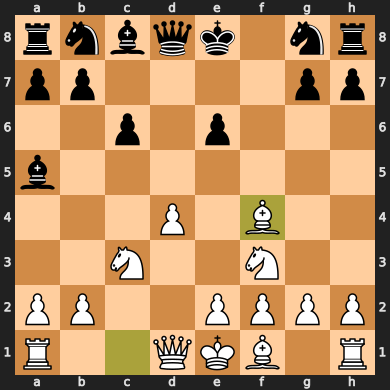

In [27]:
board = chess.Board()
print(board)
test_moves = moves_history[0]
test_moves = test_moves.split()
for move in test_moves:
    board.push_san(move)
    print(board)
    print()
board

In [28]:
df['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)